# BIKE SHARING - MULTIPLE LINEAR REGRESSION 
-------------------

### PROBLEM STATEMENT:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Our objective is to develop a model to find the variables which are significant for the demand of shared bikes from the available set of variables. 


### STEP 1: READING AND UNDERSTANDING DATA

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data from csv file

bikes = pd.read_csv('day.csv')

# Displaying header

bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking the shape of the data
bikes.shape

(730, 16)

In [4]:
# Describing columns of dataframe

bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Inspecting the dataset

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Observation**: *From the above it is observed that only variable is of object data type and the remaining are either float or integer data type. However, numerical values for variables such as 'season' & 'mnth' does not make any sense to our usecase. We have to map these with its corresponding categorical variables.*

### STEP 2: DATA CLEANING

In [6]:
# Checking for the null values

bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Observation**: *There are no null values in the dataset.*

In [7]:
# Checking for duplicates

bikes.drop_duplicates(inplace=True)

In [8]:
bikes.shape

(730, 16)

**Observation**: *There are no duplicates in the dataset.*

In [9]:
# Dropping unnecessary columns
bikes.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


**The following variables have been removed from the data table:**

- *'instant'* is same as the index row 
- *'dteday'* is the date which can be interpreted by *'year'* and *'month'* column
- *'casual'* and *'registered'* sums up to be our target variable *'cnt'*


In [10]:
# mapping categorical values

bikes['season'] = bikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikes['mnth'] = bikes['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bikes['weathersit'] = bikes['weathersit'].map({1:'clear',2:'misty',3:'light_snow_rain',4:'heavy_snow_rain'})
bikes['weekday'] = bikes['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [11]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


We have mapped numerical values of columns *'season', 'mnth' & 'weathersit'* to the respective categorical variables as mentioned in the data dictionary file.

### STEP 3: DATA VISUALIZATION

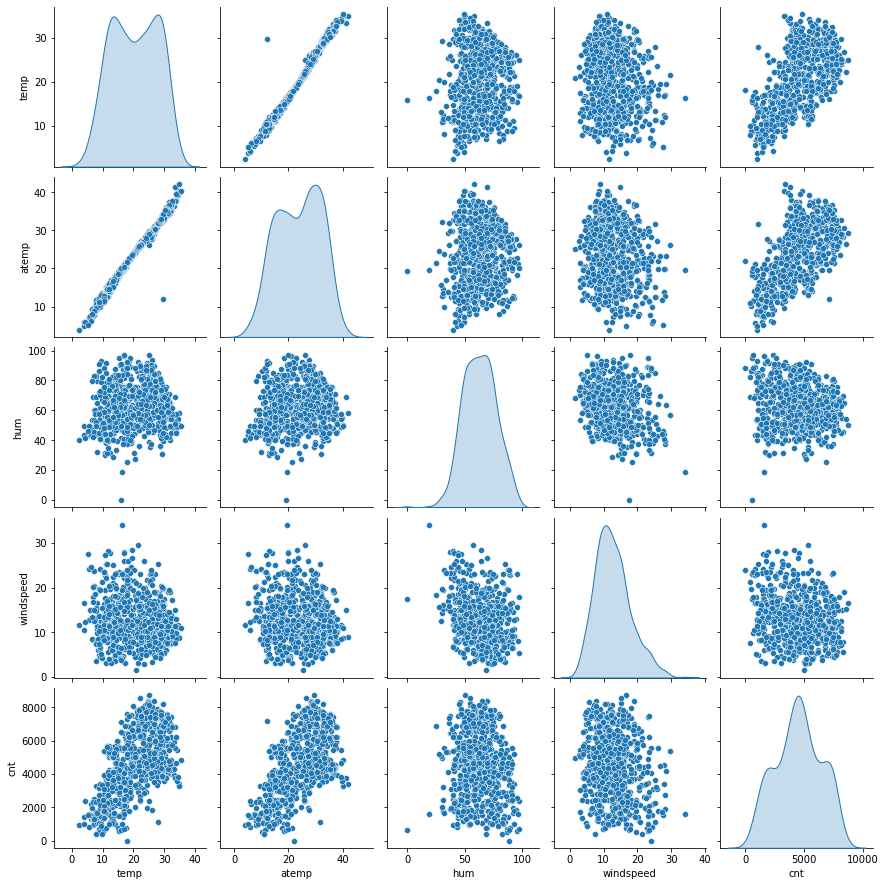

In [12]:
# Visualizing numerical variable

bikes_num = bikes[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bikes_num, diag_kind='kde')
plt.show()

**Observations:** *We can see a linear relationship between 'temp', 'atemp' & 'cnt'*

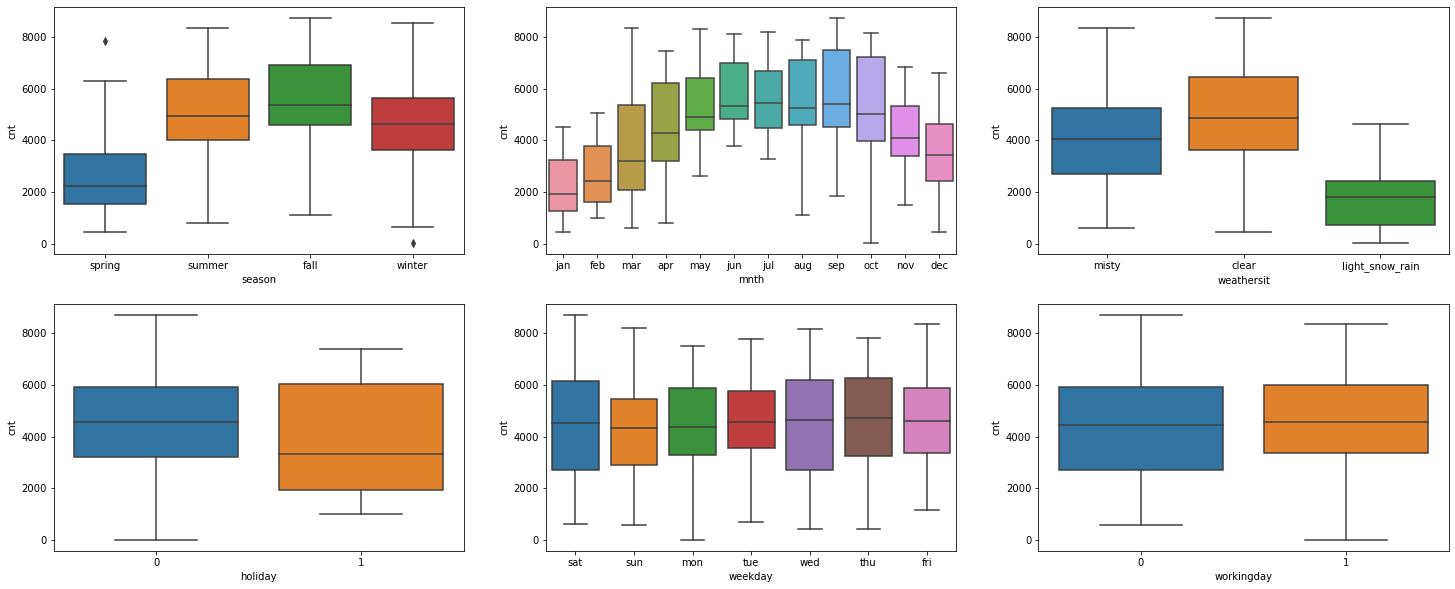

In [13]:
# Visualizing categorical variable

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.show()

**Observations:** 
- For seasons variable, bike sharing is more in  summer and fall while it is less in spring.
- From the month variable, demand is more from may to october. Least demand is seen in January. 
- Demand is more during clear good weather. 
- Bookings are more on days which are not holidays. However, it is not such a good predictor variable. 
- Weekdays is also not very good predictor on observing the trend. 
- Most of the demand is observed on working days 



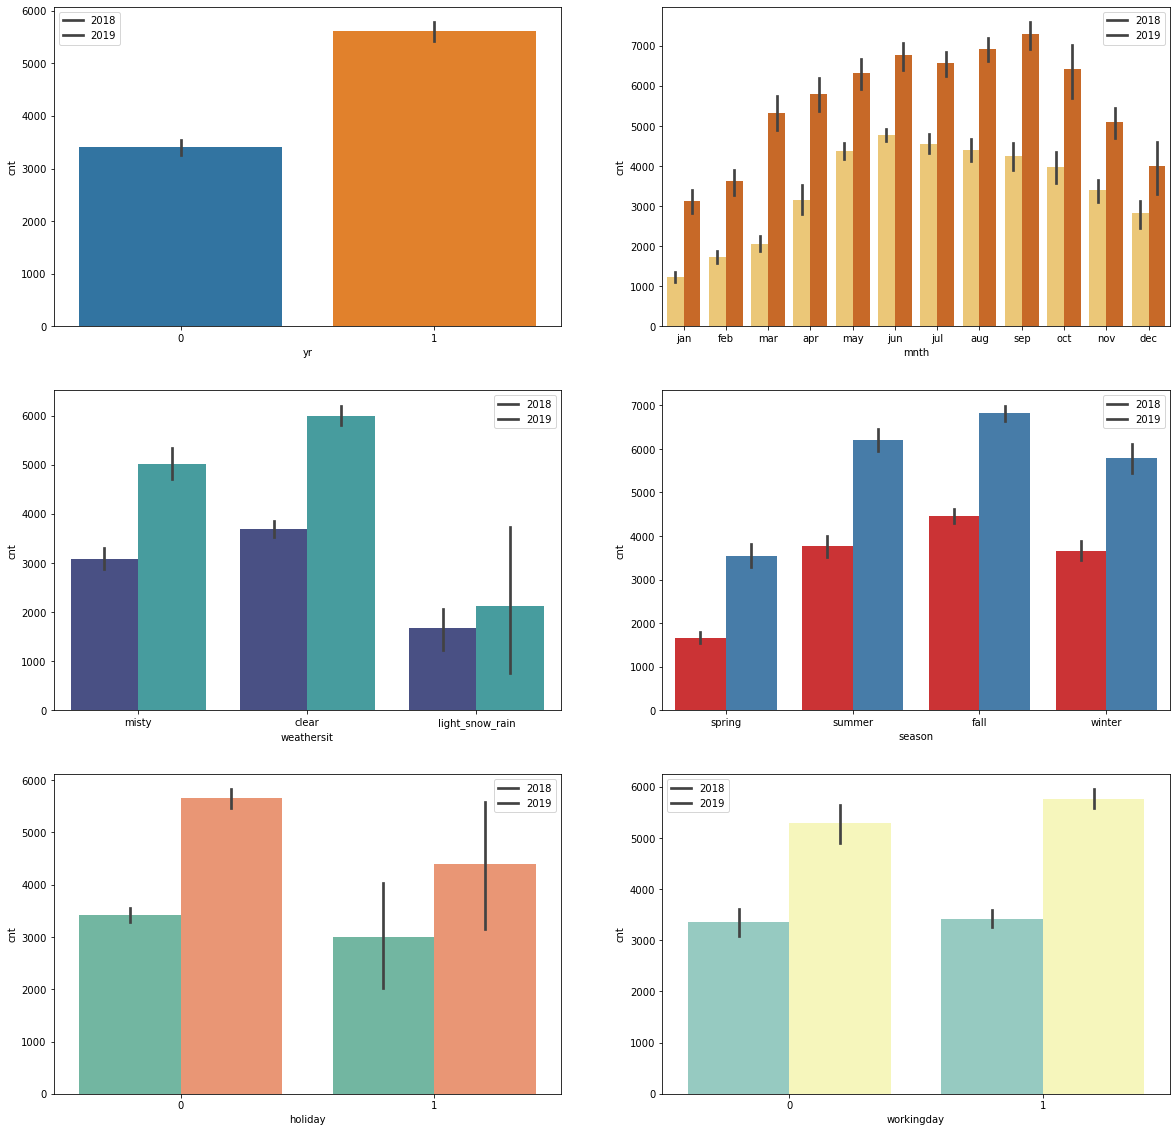

In [14]:
# Visualizing data by year

plt.figure(figsize = (20,20))
plt.subplot(3,2,1)
sns.barplot('yr','cnt',data=bikes)
plt.legend(labels=['2018', '2019'])
plt.subplot(3,2,2)
sns.barplot('mnth','cnt',data=bikes, hue='yr',palette='YlOrBr')
plt.legend(labels=['2018', '2019'])
plt.subplot(3,2,3)
sns.barplot('weathersit','cnt',data=bikes, hue='yr',palette='mako')
plt.legend(labels=['2018', '2019'])
plt.subplot(3,2,4)
sns.barplot('season','cnt',data=bikes, hue='yr',palette='Set1')
plt.legend(labels=['2018', '2019'])
plt.subplot(3,2,5)
sns.barplot('holiday','cnt',data=bikes, hue='yr',palette='Set2')
plt.legend(labels=['2018', '2019'])
plt.subplot(3,2,6)
sns.barplot('workingday','cnt',data=bikes, hue='yr',palette='Set3')
plt.legend(labels=['2018', '2019'])
plt.show()


**Observations:**
- Business have increased in 2019 compared to 2018.
- For both years, demand is more from may to october. Least demand is seen in January.
- Demand is more during clear good weather and least during rainy or snowy days
- When it is not a holiday, bookings are more. 
- Not much of a difference is observed in the demand on working days or weekends. 

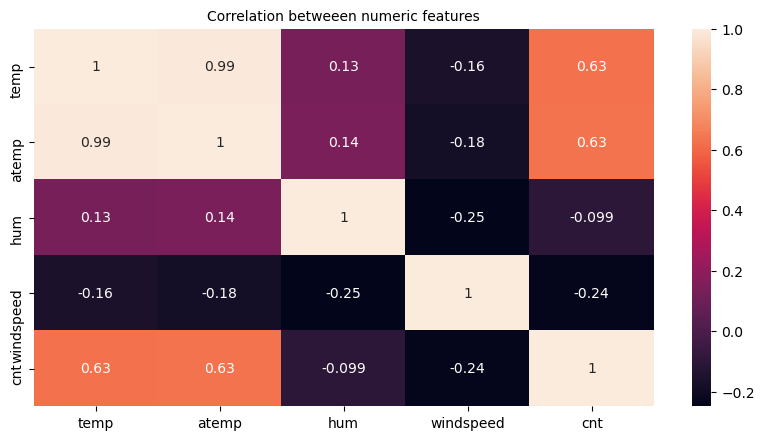

In [15]:
# correlation between numerical features

num_vars = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(10,5),dpi=100)
plt.title("Correlation betweeen numeric features",fontsize=10)
sns.heatmap(bikes[num_vars].corr(),annot= True)
plt.show()

**Observations:**
- We can observe very high correlation between *'temp'* and *'atemp'*. This indicates mutlicollinearity
- We also observe some linear relationship for *'cnt'* with *'temp'* and *'atemp'*

### STEP 4: DATA PREPROCESSING

In order to prepare the data for the model, we need to perform some preprocessing steps. We need to conver the categorical variables to dummy variables for the model to interpret. 

We have 4 columns with categorical variables:
    
    - 'season'
    - 'mnth'
    - 'weathersit'
    - 'weekday'

In [16]:
# Creating dummy variabled for categorical variables

bikes = pd.get_dummies(data=bikes,columns=['season','mnth','weathersit','weekday'],drop_first=True)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weathersit_light_snow_rain,weathersit_misty,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weathersit_light_snow_rain', 'weathersit_misty', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

### STEP 5: TRAIN-TEST SPLIT & SCALING

In [18]:
bikes.shape

(730, 30)

In [19]:
# Train-Test split with 70:30 ratio
df_train, df_test = train_test_split(bikes, train_size = 0.7, random_state = 100)

In [20]:
# shape of df_train
df_train.shape

(510, 30)

In [21]:
# shape of y_train
df_train.shape

(510, 30)

In [22]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

# Scaling to all features except binary and dummy variables
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# Verifying using describe()
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weathersit_light_snow_rain,weathersit_misty,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.029412,0.345098,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.169124,0.475867,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


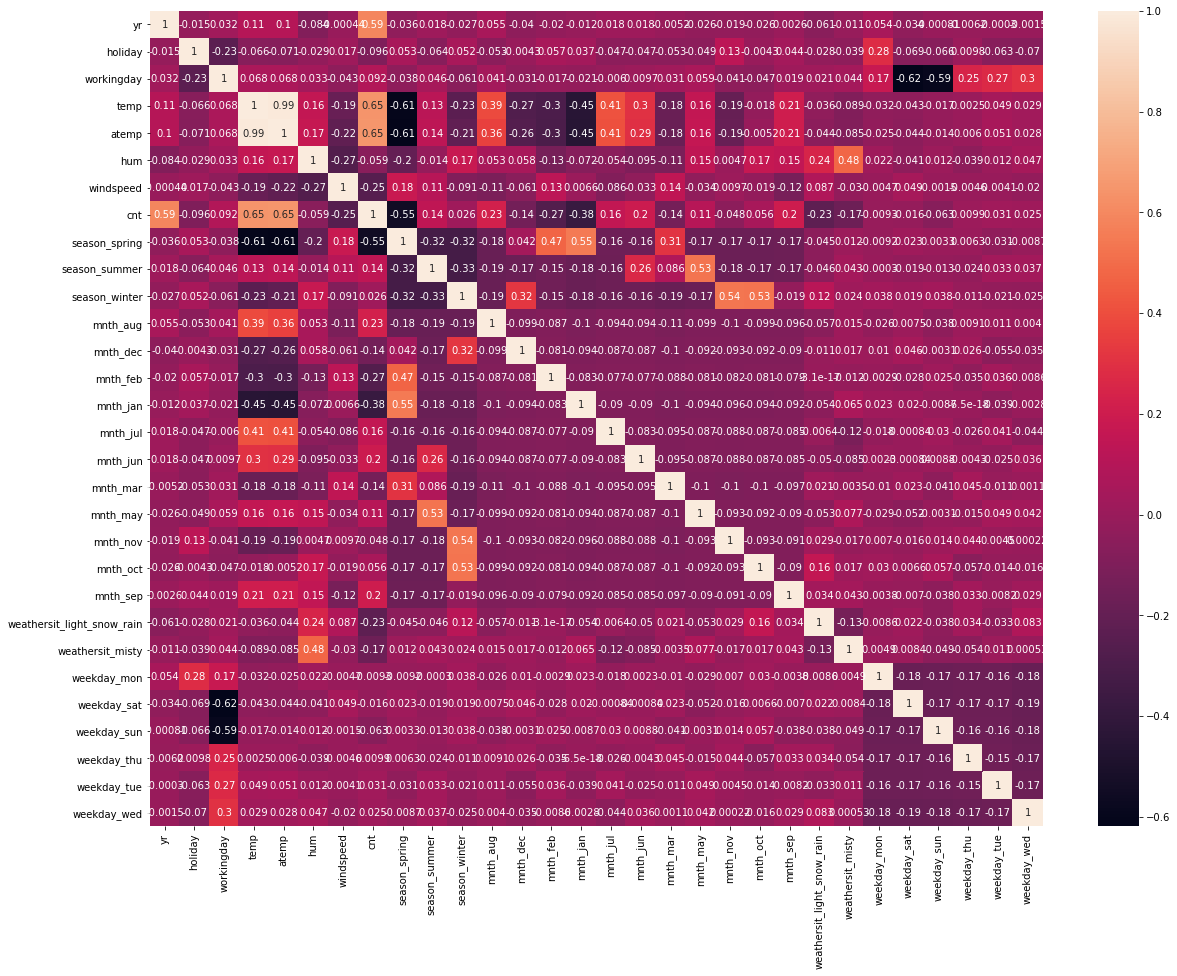

In [23]:
# correlation check for features in the training set

plt.figure(figsize = (20, 15)) 
sns.heatmap(df_train.corr(), annot = True)
plt.show()

**Observation:**
- As observed earlier, temp and atemp have very high correlation.
- Year, temp & atemp has a postive correlation with cnt 
- Humidity and weathersit_misty shows positive correlation
- Oct, Nov, Dec shows positive correlation with season_winter
- May, Jun is positively correlated with season_summer
- Jan, Feb shows postive correlation witgh season_spring
- Jun, Jul, Aug shows positive correlation with temp & atemp
- Sat, Sun shows negetive correlation with working day
- season_spring shows negetive correlation with temp & atemp


### STEP 6: MULTIPLE LINEAR REGRESSION MODEL BUILDING

#### Building model using RFE

In [24]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [25]:
# LR model building
lr = LinearRegression()
lr.fit(X_train,y_train)

# Reduce number of features to 15 using RFE 
# automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [26]:
# Columns selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 13),
 ('mnth_sep', True, 1),
 ('weathersit_light_snow_rain', True, 1),
 ('weathersit_misty', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 12)]

In [27]:
# Selected columns

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jan',
       'mnth_jul', 'mnth_sep', 'weathersit_light_snow_rain',
       'weathersit_misty', 'weekday_sat'],
      dtype='object')


In [28]:
# Removed columns

X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [29]:
# Function to build a model using statsmodels
def build_model(data):
    X_train_sm = sm.add_constant(data)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [30]:
#  Defining function to get VIF Values

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [31]:
# Training set with RFE selected columns

X_train_rfe = X_train[col]

In [32]:
build_model(X_train_rfe)
calculateVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          4.22e-191
Time:                        23:00:19   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.46
7,season_summer,2.85
13,weathersit_misty,2.29
0,yr,2.09
14,weekday_sat,1.98


#### Building model using manual feature selection

From the above summary, we can notice that the p-value of *mnth_jan* is almost 5. Hence, we will drop *mnth_jan* first.

In [33]:
# Dropping mnth_jan
X_train_1 = X_train_rfe.drop(['mnth_jan'], axis = 1)
X_train_1.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_jul,mnth_sep,weathersit_light_snow_rain,weathersit_misty,weekday_sat
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,1,0


In [34]:
build_model(X_train_1)
calculateVIF(X_train_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          2.11e-191
Time:                        23:00:19   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
4,hum,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
6,season_spring,4.24
8,season_winter,3.42
7,season_summer,2.85
12,weathersit_misty,2.29
0,yr,2.08
13,weekday_sat,1.97


VIF for humidity is high as we have considered the threshold for VIF as 5. Hence, we will drop *hum* from the train set next

In [35]:
# Dropping hum variable
X_train_2 = X_train_1.drop(['hum'], axis = 1)
X_train_2.head()

,yr,holiday,workingday,temp,windspeed,season_spring,season_summer,season_winter,mnth_jul,mnth_sep,weathersit_light_snow_rain,weathersit_misty,weekday_sat
576,1,0,1,0.815169,0.264686,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.255342,1,0,0,0,0,0,1,1
728,1,0,0,0.245101,0.663106,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.188475,0,1,0,0,0,0,1,1
111,0,0,1,0.345824,0.380981,0,1,0,0,0,0,1,0


In [36]:
build_model(X_train_2)
calculateVIF(X_train_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          1.28e-188
Time:                        23:00:19   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,season_spring,2.49
6,season_summer,2.34
0,yr,2.07
7,season_winter,1.98
12,weekday_sat,1.96
8,mnth_jul,1.58
11,weathersit_misty,1.57


VIF for *temp* seems higher than threshold 5. Lets try dropping *temp* column.

In [37]:
# Dropping temp variable
X_train_3 = X_train_2.drop(['temp'], axis = 1)
build_model(X_train_3)
calculateVIF(X_train_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.9
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          1.68e-149
Time:                        23:00:19   Log-Likelihood:                 412.53
No. Observations:                 510   AIC:                            -799.1
Df Residuals:                     497   BIC:                            -744.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
3,windspeed,4.22
2,workingday,3.82
4,season_spring,2.31
5,season_summer,2.29
6,season_winter,1.98
0,yr,1.91
11,weekday_sat,1.69
10,weathersit_misty,1.56
7,mnth_jul,1.30
8,mnth_sep,1.25


From the above summary, we can see that the r-squared for this model has reduced a lot from the previous one. For this reason, we will keep temp variable. Also from the earliear plots, we had observed that working day not much effect on the target variable cnt.

In [38]:
# Dropping workingday variable instead
X_train_4 = X_train_2.drop(['workingday'], axis = 1)
build_model(X_train_4)
calculateVIF(X_train_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.6
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          1.68e-186
Time:                        23:00:19   Log-Likelihood:                 500.38
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     497   BIC:                            -919.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
2,temp,5.12
3,windspeed,4.62
5,season_summer,2.23
4,season_spring,2.10
0,yr,2.07
6,season_winter,1.79
7,mnth_jul,1.58
10,weathersit_misty,1.55
8,mnth_sep,1.34
11,weekday_sat,1.19


Weekdays also had less impact the target variable cnt. 

In [39]:
# Dropping weekday_sat variable
X_train_5 = X_train_4.drop(['weekday_sat'], axis = 1)
build_model(X_train_5)
calculateVIF(X_train_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          5.06e-187
Time:                        23:00:19   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,season_summer,2.23
4,season_spring,2.08
0,yr,2.07
6,season_winter,1.78
7,mnth_jul,1.58
10,weathersit_misty,1.55
8,mnth_sep,1.34
9,weathersit_light_snow_rain,1.08


From the correlation matrix, we had observed that july had a positive correlation with tem. In order to bring the VIF of temp down, we can try to remove mnth_jul variable.

In [40]:
# Dropping mnth_jul variable
X_train_6 = X_train_5.drop(['mnth_jul'], axis = 1)
build_model(X_train_6)
calculateVIF(X_train_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          1.47e-186
Time:                        23:00:19   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,season_spring,1.99
5,season_summer,1.90
6,season_winter,1.63
9,weathersit_misty,1.55
7,mnth_sep,1.23
8,weathersit_light_snow_rain,1.08
1,holiday,1.04


We can observe from the above summary that:
- R-sqauared and Adj. R-squared is 0.833 & 0.829 respectively. 
- F static of 248 indicates an overall good model
- p-values are all almost 0 indicating significance.
- VIF for all variables are below 5 indicating minimal multicollinearity.

Lets proceed to do further analysis to ensure that the model is good enough for our predictions.

### STEP 7: RESIDUAL ANALYSIS

In order to validate that our assumptions of linear regression are intact, we will perform residual analysis on the error terms

In [41]:
lr = LinearRegression()
lr_6 = lr.fit(X_train_6,y_train)
print(lr.intercept_,lr.coef_)

0.19085463876200248 [ 0.23413182 -0.09631608  0.47773656 -0.14809801 -0.05540612  0.0620761
  0.09447641  0.09099761 -0.28503144 -0.0787407 ]


In [42]:
# Predicting y_train

y_train_pred = lr_6.predict(X_train_6)

Text(0.5, 0, 'Errors')

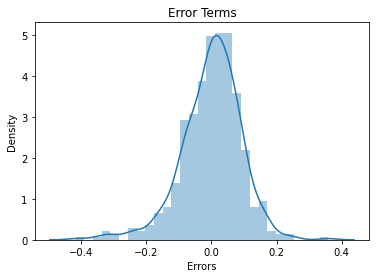

In [43]:
# Plot a histogram of the error terms to verify that it is normally distributed
sns.distplot(y_train - y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')

We can confirm normal distribution for error terms.

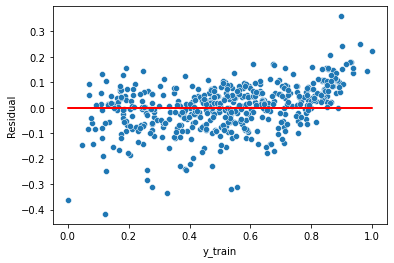

In [44]:
# Verifying that the error terms are independent of each other.
# Homoesdacity

residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('y_train')
plt.ylabel('Residual')
plt.show()

We can see that the errors are spread well around y=0. No visible pattern can be observed. 

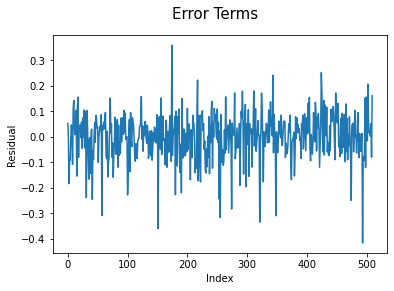

In [45]:
# Checking for no auto correlation of errors
c = [i for i in range(0,len(X_train_6),1)]
plt.plot(c,residual)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Residual')
plt.show()

Hence, we can confirm no autocorrelation of errors. Errors are independant.

In [46]:
# Print R-squared Value
r2_score(y_train,y_train_pred)

0.8327073211549113

### Step 8: Making Predictions Using the Final Model


In [47]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weathersit_light_snow_rain,weathersit_misty,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,1,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,1,0,0


In [48]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weathersit_light_snow_rain,weathersit_misty,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.027273,0.318182,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.163248,0.466833,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
y_test = df_test.pop('cnt')
X_test = df_test

cols = X_train_6.columns

X_test = X_test[cols]

# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)

y_test_pred = lr_6.predict(X_test_sm[cols])

In [50]:
r2 = r2_score(y_test,y_test_pred)
print(r2)

0.803819599072884


In [51]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7944


From the above, we can conclude that the model is predicting fairly well.

### STEP 9: MODEL EVALUATION

Text(0, 0.5, 'y_test_pred')

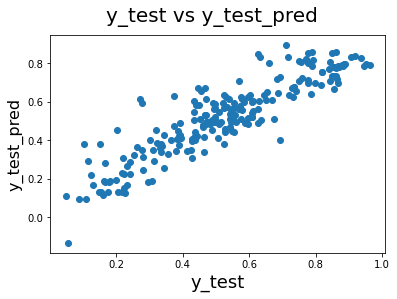

In [52]:
# Plotting y_test and y_pred

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16) 

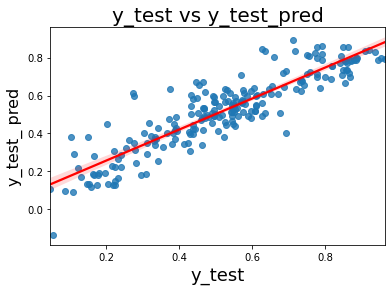

In [53]:
# Visualizing the fit on the test data

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, fit_reg=True,line_kws={"color": "red"})
#ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"}
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_ pred', fontsize=16)
plt.show()

# CONCULSION
#### Comparing Training and Testing data:
    - Train dataset R^2          : 0.833
    - Test dataset R^2           : 0.804
    - Train dataset Adjusted R^2 : 0.829   
    - Test dataset Adjusted R^2  : 0.794


#### F Statistics:
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

    - F-statistic: 229.6
    - Prob (F-statistic): 5.06e-187
The F-Statistics value of 230 and the p-value of approximately 0 states that the overall model is significant

#### Most Important Variables:

In [54]:

X_train_6.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_sep', 'weathersit_light_snow_rain',
       'weathersit_misty'],
      dtype='object')

<pre>
Important variables from the model we have finalised are :
    - Temperature
    - Seasons
    - Weather Situation
</pre>

#### Observations from the EDA:
- With increase in temperature, there is an increase in demand for bike sharing. A linear relationship is observed between temperature and count. 
- Business is better from May until October. And least in January. 
- There is a better demand in fall followed by summer.
- Popularity for bike sharing is more when the weather is clear.
- Business has attracted more customers in 2019 compared to 2018. 